# Exercise 004

<a href="https://colab.research.google.com/github/FAIRChemistry/PythonProgrammingBio24/blob/main/solutions/Exercise004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Please execute this cell to download the necessary data
!wget https://github.com/JR-1991/PythonProgrammingBio24/raw/main/data/gc_len_data.csv

In [ ]:
# Please execute this cell to install the necessary packages
!pip install seaborn matplotlib pandas scikit-learn

In [143]:
# There are many unnecessary warnings coming from Seaborn
# The following cell will let Python ignore these

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Visualisation of Distributions #1

Read the CSV file `gc_len_data.csv` using the Pandas method `pd.read_csv(path)` and store the result in `DataFrame` in variable `df`. Now use `seaborn` or `matplotlib` to visualize the distribution of all seqeunce lengths found in column `lens`.

**Tips**

> * Importing a package is done via `import package` where package is substituted with the name of the package you want to import. You can also rename a package by using``import package as renamed` where renamed is the new with which you can use the pckage.
> * By convention, `pandas` is always imported as `pd` and `seaborn` as `sns`
> Seaborn allows you to directly use a Pandas `DataFrame` object (stored in variable `df`). In the following is a usage example:

**Example**

Please refer to our [notes](https://jr-1991.github.io/PythonProgrammingBio24/notes/Seminar_004/) for an in-depth example.

```python
# Seaborn - We pass in the data and specify which column to use
sns.countplot(x="a_column", data=df)
```


In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./gc_len_data.csv")

Text(0.5, 1.0, 'Distribution of lengths')

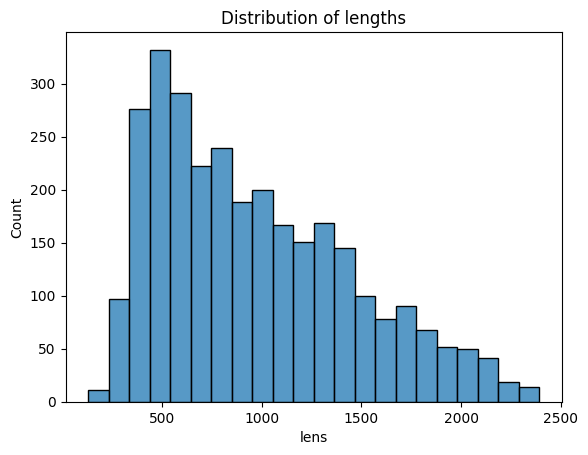

In [28]:
# Using Seaborn
f = sns.histplot(data=df, x="lens")
f.set_title("Distribution of lengths")

Text(0.5, 1.0, 'Distribution of lengths |\xa0Kernel Density Estimate')

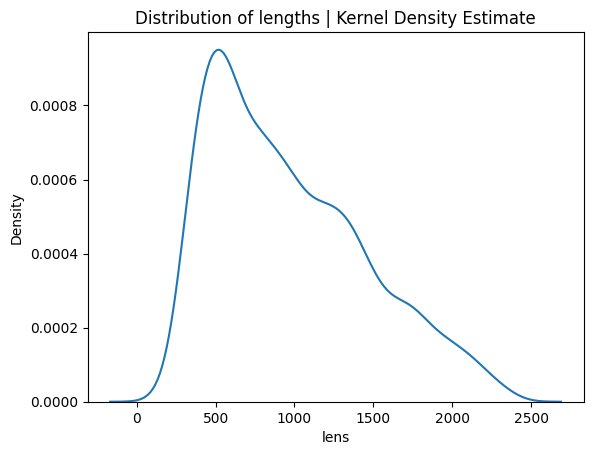

In [29]:
# Alternative, KDE Plot
f = sns.kdeplot(data=df, x="lens")
f.set_title("Distribution of lengths | Kernel Density Estimate")

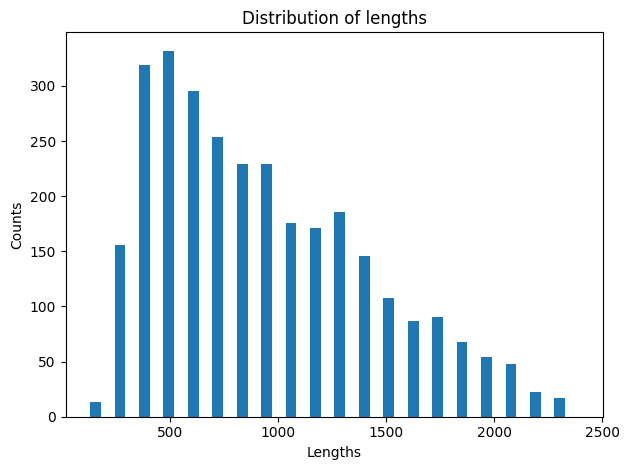

In [30]:
# Using matplotlib
f, ax = plt.subplots()
hist = ax.hist(df.lens, bins=20, width=50)

ax.set_title("Distribution of lengths")
ax.set_ylabel("Counts")
ax.set_xlabel("Lengths")

plt.tight_layout()

### Coloration by class

Repeat the visualization, but now color the distribution in relation to the organism. Which conclusions can you gather from the new plot?

**Tips**

> * Some methods found in Seaborns have an argument with which you can specifiy to colour by a specific column. These can be categorical or numerical.
> * Use the argument `multiple` to specifiy how to handle multiple categories in Seaborn's `histplot` or `kdeplot`. See the [documentation](https://seaborn.pydata.org/api.html) to learn more.

Text(0.5, 1.0, 'Distribution of lengths')

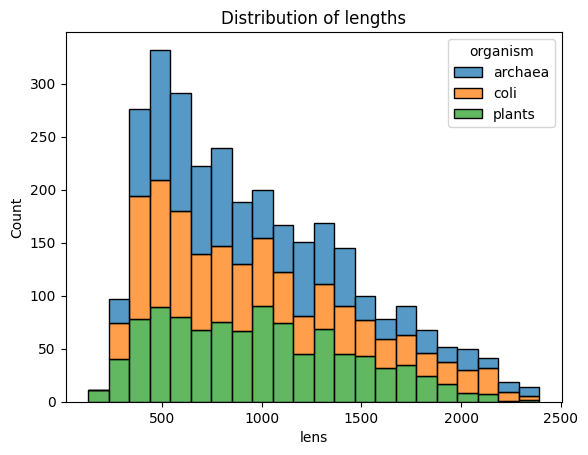

In [31]:
# Using Seaborn
f = sns.histplot(data=df, x="lens", hue="organism", multiple="stack")
f.set_title("Distribution of lengths")

Text(0.5, 1.0, 'Distribution of lengths |\xa0Kernel Density Estimate')

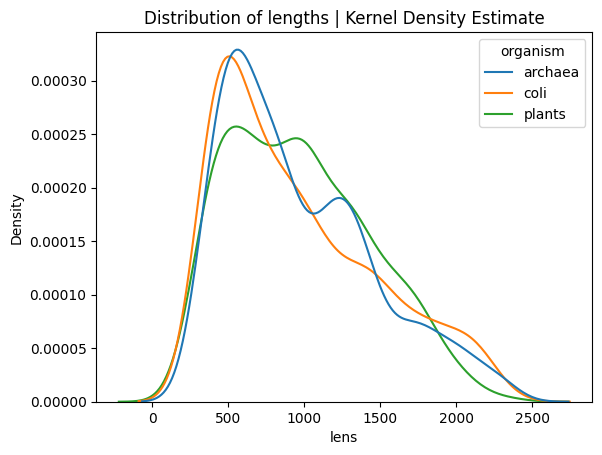

In [32]:
# Alternative, KDE Plot
f = sns.kdeplot(data=df, x="lens", hue="organism")
f.set_title("Distribution of lengths | Kernel Density Estimate")

## Visualisation of Distributions #2

Repeat the first exercise now for the gc content using the column `gc`. Can you detect a trend?

> Note for this solution - We will make use of subplots to merge with our previous plots!

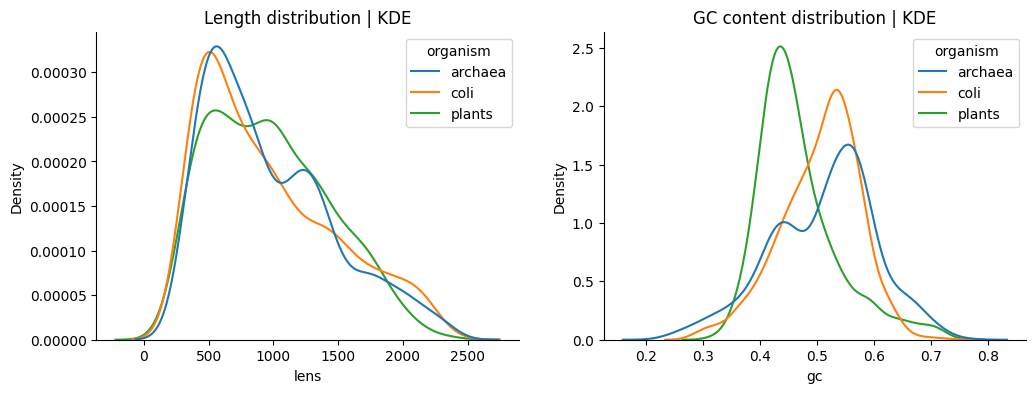

In [41]:
# Using seaborn
f, ax = plt.subplots(1, 2, figsize=(12,4))

lens = sns.kdeplot(data=df, x="lens", hue="organism", ax=ax[0])
gc = sns.kdeplot(data=df, x="gc", hue="organism", ax=ax[1])

lens.set_title("Length distribution | KDE")
gc.set_title("GC content distribution | KDE")

sns.despine()

In [93]:
# Helper functions for Matplotlib
def plot_hist(
    ax: plt.Axes,
    df: pd.DataFrame,
    label_col: str,
    col: str,
    **kwargs
) -> None:
    """Plots a histogram of filtered data to a subplot"""
    
    data, labels = _split_by_labels(df, label_col, col)
    
    ax.hist(data, label=labels, **kwargs)
    
def _split_by_labels(df: pd.DataFrame, label_col: str, col: str):
    """Separates a DataFrame by a given col and returns these with the labels"""
    
    labels = sorted(list(set(df[label_col]))) # Turn a set into a list and sort it
    data = []
    
    for label in labels:
        data.append(
            df[df[label_col] == label][col].values
        )
        
    return tuple(data), tuple(labels)

def plot_descriptions(
    ax: plt.Axes,
    title: str,
    x_label: str,
    y_label: str,
) -> None:
    """Sets all things necessary to describe the plot"""
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle=":")
    ax.legend()
    

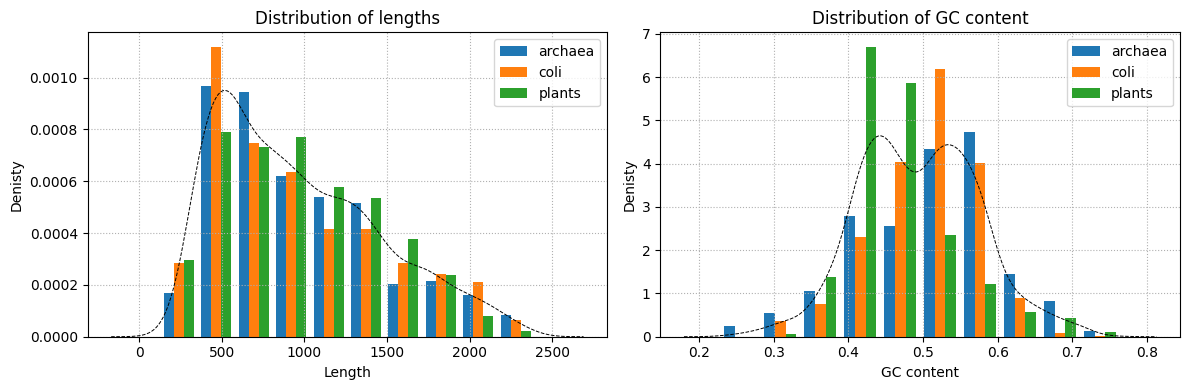

In [128]:
# Using matplotlib
import numpy as np
from scipy import stats

f, (lens, gc) = plt.subplots(1, 2, figsize=(12,4))

HIST_KWARGS = dict(density=True, bins=10)

plot_hist(lens, df, "organism", "lens", **HIST_KWARGS)
plot_hist(gc, df, "organism", "gc", **HIST_KWARGS)
    
plot_descriptions(
    ax=lens,
    title="Distribution of lengths",
    x_label="Length",
    y_label="Denisty"
)

plot_descriptions(
    ax=gc,
    title="Distribution of GC content",
    x_label="GC content",
    y_label="Denisty"
)

# You can also combine both!
sns.kdeplot(data=df, x="lens", ax=lens, color="black", linestyle="--", linewidth=0.7)
sns.kdeplot(data=df, x="gc", ax=gc, color="black", linestyle="--", linewidth=0.7)

plt.tight_layout()


## Visualisation of bivariate data

In many of our applications and experiments, we want to understand how two features are related to each other. For example, we might want to examine how two variables are correlated in order to develop a hypothesis. In addition to using a quantitative measure like the "R-Squared" value, it can be helpful to create a graph that displays the relationship between the two variables.

Calculate the Correlation Matrix of dataset `df` and print the result. Now visualize both columns `gc` and `lens` in a single plot.

**Tips**

> * The example [gallery](https://seaborn.pydata.org/examples/index.html) of Seaborn can be very inspiring!
> * Pandas can calculate a lot of statistic too. See [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#) and [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) 

,lens,gc,ATA,ATC,ATT,ATG,ACA,ACC,ACG,ACT,...,TTA,TTG,TAC,TAT,TAA,TAG,TGC,TGT,TGA,TGG
lens,1.000000,-0.073403,0.035202,0.082873,0.049099,-0.112150,0.020047,-0.076252,-0.066334,-0.027173,...,0.069391,0.025531,-0.053873,0.101131,-0.072084,-0.116276,-0.081650,-0.058079,-0.041207,-0.022535
gc,-0.073403,1.000000,-0.536402,-0.028641,-0.659178,-0.172720,-0.224356,0.371197,0.460050,-0.274221,...,-0.526265,-0.365993,-0.075311,-0.588188,-0.221445,-0.035002,0.239730,-0.179582,0.116194,0.248143
ATA,0.035202,-0.536402,1.000000,0.063332,0.337361,0.152150,0.139217,-0.159693,-0.164365,0.032736,...,0.426791,0.253525,-0.025230,0.262029,0.251726,0.141997,-0.017431,0.102792,0.068478,-0.066099
ATC,0.082873,-0.028641,0.063332,1.000000,0.074827,0.121556,-0.088978,0.132648,-0.000029,-0.095562,...,-0.011570,0.061131,0.078822,-0.044597,-0.084544,-0.024989,0.062315,-0.079825,-0.135901,-0.118146
ATT,0.049099,-0.659178,0.337361,0.074827,1.000000,0.100253,0.062093,-0.210940,-0.368225,0.148465,...,0.305913,0.219937,0.058306,0.373929,0.042700,-0.106750,-0.160434,0.088574,-0.212920,-0.229491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAG,-0.116276,-0.035002,0.141997,-0.024989,-0.106750,-0.010640,-0.031593,-0.039550,0.104059,-0.056151,...,0.179820,0.125804,-0.012969,0.013035,0.453133,1.000000,0.047718,0.055306,0.249832,0.153238
TGC,-0.081650,0.239730,-0.017431,0.062315,-0.160434,-0.100399,-0.032637,0.141480,0.112083,-0.099059,...,-0.089369,-0.093946,0.007426,-0.153444,0.116111,0.047718,1.000000,0.256934,0.379147,0.254318
TGT,-0.058079,-0.179582,0.102792,-0.079825,0.088574,-0.066854,0.060601,-0.073554,-0.117629,0.034688,...,0.127068,0.022214,0.006307,0.107467,0.163355,0.055306,0.256934,1.000000,0.238040,0.104749
TGA,-0.041207,0.116194,0.068478,-0.135901,-0.212920,-0.064704,0.109118,0.026817,0.194173,-0.112937,...,0.092226,-0.043225,-0.118656,-0.064503,0.420320,0.249832,0.379147,0.238040,1.000000,0.318205


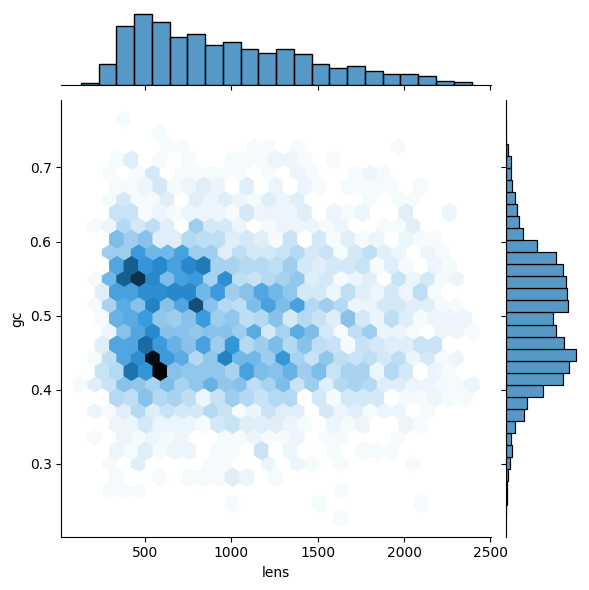

In [134]:
# Calculate the correlation matrix
correlation = df.corr(numeric_only=True)

# Plot a bivariate plot for lens and gc
sns.jointplot(data=df, x="lens", y="gc", kind="hex")

# Use it at last to get the table preview
correlation

## Multidimensional data

It's not uncommon for data to have more columns than we can easily comprehend in our three-dimensional world. In these cases, we can use techniques like dimensionality reduction and visualization to help us understand the data better. One of the most popular methods for dimensionality reduction is called [Principle Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA). This statistical technique helps us identify the components that explain most of the variation in the data.

To use PCA, we need to utilize a module called `scikit-learn`, which also contains many other machine learning algorithms. Since the `df` dataset comprises not only `gc` and `lens` but also individual codon usage, we can use PCA to demonstrate that our classes are more or less distinctive. To apply PCA to the dataset, please make use of the provided `pca` function.

In [140]:
# Execute this cell to use the function

import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

def pca(data: pd.DataFrame) -> pd.DataFrame:
    """Takes a DataFrame and calculates the first two principle components
    
    Args:
        data (pd.DataFrame): The data used to gather the PCs
        
    Returns:
        pd.DataFrame: The resulting PCA data 
    """
    
    scaler = MinMaxScaler()    
    data = scaler.fit_transform(data.select_dtypes(include='number'))
    
    pcs = PCA(n_components=2).fit_transform(data)
    
    return pd.DataFrame(
        {"PC1": pcs[:, 0], "PC2": pcs[:, 1]}
    )

Text(0.5, 1.0, 'Principle Component Analysis')

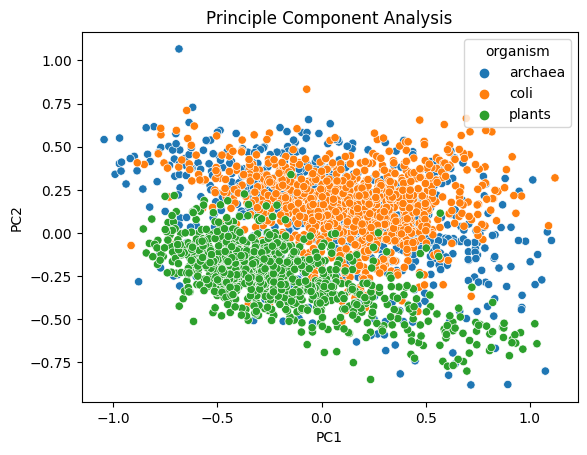

In [142]:
# Apply PCA
df_pca = pca(df)

# Add the labels again for the hue option
df_pca["organism"] = df.organism

plot = sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="organism")
plot.set_title("Principle Component Analysis")